In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [1]:
# if import cv2 fails we need to install opencv for python
!pip install opencv-python

In [2]:
import cv2

In [10]:
%matplotlib inline
import numpy as np

from matplotlib import pyplot as plt

In [4]:
import requests

In [12]:
cvlogo = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/OpenCV_Logo_with_text_svg_version.svg/360px-OpenCV_Logo_with_text_svg_version.svg.png")


In [13]:
with open("cvlogo.png", "wb") as f:
    f.write(cvlogo.content)

In [14]:
img = cv2.imread("cvlogo.png")

In [5]:
horse = cv2.imread("horse-jordan-sanchez.jpg")

In [6]:
horse.size

1132512

In [7]:
horse.shape

(502, 752, 3)

In [8]:
502*752*3

1132512

In [9]:
type(horse)

numpy.ndarray

In [15]:
img.size

479520

In [16]:
img.shape

(444, 360, 3)

In [17]:
444*360*3

479520

In [18]:
type(img)

numpy.ndarray

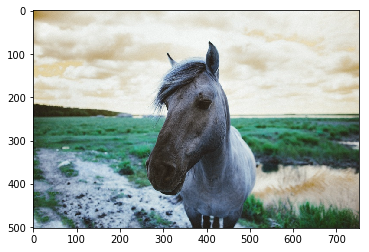

In [11]:
plt.imshow(horse)
plt.show()

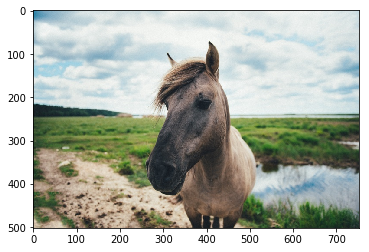

In [12]:
# cv stores colors in different order than matplotlib
newhorse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
plt.imshow(newhorse)
plt.show()

In [13]:
def plotColorHist(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

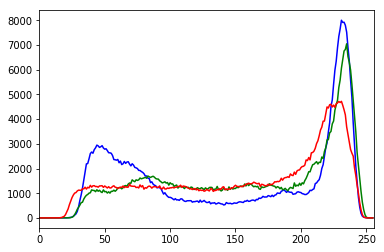

In [14]:
plotColorHist(horse)

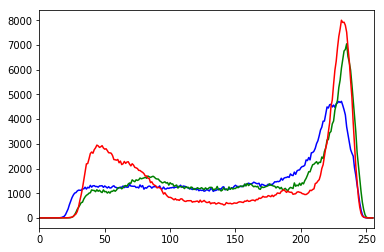

In [15]:
plotColorHist(newhorse)

In [18]:
def detectKeypointsSurf(src):
    #-- Step 1: Detect the keypoints using SURF Detector
    minHessian = 400
    # non free algo!!!
    # https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/
    # detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
    detector = cv2.O
    keypoints = detector.detect(src)
    #-- Draw keypoints
    # create empty image with same dimensions and color depth as src
    img_keypoints = np.empty((src.shape[0], src.shape[1], 3), dtype=np.uint8)
    cv2.drawKeypoints(src, keypoints, img_keypoints)
    #-- Show detected (drawn) keypoints
    plt.imshow(img_keypoints)
    plt.show()

In [31]:
def detectKeypointsOrb(img):
    # Initiate STAR detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp = orb.detect(img,None)

    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    # blank needed just because of peculariaties of interfacing with c++ lib for opencv
    # this is hell! https://stackoverflow.com/questions/31631352/typeerror-required-argument-outimg-pos-6-not-found
    # https://docs.opencv.org/3.1.0/d1/d89/tutorial_py_orb.html is INCORRECT!!!
    blank = np.empty((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    # draw only keypoints location,not size and orientation
    img2 = cv2.drawKeypoints(img,kp,blank,color=(255,0,0), flags=0)
    plt.imshow(img2)
    plt.show()

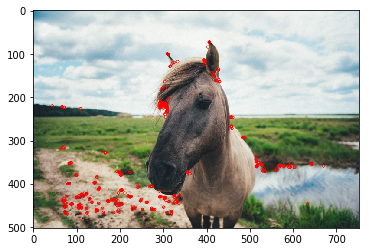

In [32]:
detectKeypointsOrb(newhorse)

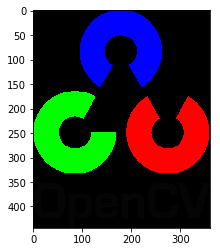

In [20]:

plt.imshow(img)
plt.show()